In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/semester 6 /AJS/TUBES FINAL /DATASET NEW/Copy of MARVEL .csv')

In [ ]:
df

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN


In [ ]:
selected_columns = ['name', 'APPEARANCES', 'FIRST APPEARANCE']  # Ubah dengan kolom yang ingin Anda gunakan
df = df[selected_columns]
num_rows = 500  # Ganti dengan jumlah baris yang ingin Anda ambil
df = df.head(num_rows)

In [ ]:
df

,name,APPEARANCES,FIRST APPEARANCE
0,Spider-Man (Peter Parker),4043.0,Aug-62
1,Captain America (Steven Rogers),3360.0,Mar-41
2,"Wolverine (James \""Logan\"" Howlett)",3061.0,Oct-74
3,"Iron Man (Anthony \""Tony\"" Stark)",2961.0,Mar-63
4,Thor (Thor Odinson),2258.0,Nov-50
...,...,...,...
495,Surtur (Earth-616),79.0,Oct-63
496,Stranger (Cosmic Being) (Earth-616),79.0,May-65
497,Brandy Clark (Earth-616),79.0,Dec-79
498,Lillian Crawley (Earth-616),79.0,Aug-83


bagian  Girvan-Newman Algorithm

langkah 1

In [ ]:
# 2. Membangun graf jaringan
G = nx.from_pandas_edgelist(df, 'name', 'APPEARANCES', 'FIRST APPEARANCE')


In [ ]:
# 3. Menghitung nilai betweenness centrality
betweenness = nx.edge_betweenness_centrality(G)

In [ ]:
# Menyimpan nilai betweenness centrality awal sebelum iterasi
initial_betweenness = dict(betweenness)
# Inisialisasi variabel untuk menyimpan hasil komunitas
communities = []

langkah 2

In [ ]:
while True:
    # 4. Menghapus sisi dengan nilai betweenness centrality tertinggi
    max_betweenness = max(betweenness.values())
    edges_to_remove = [edge for edge, betweenness_value in betweenness.items() if betweenness_value == max_betweenness]
    G.remove_edges_from(edges_to_remove)

    # 5. Mengulangi perhitungan nilai betweenness centrality
    betweenness = nx.edge_betweenness_centrality(G)

    # 6. Evaluasi dan interpretasi hasil
    num_components = nx.number_connected_components(G)
    if num_components > len(communities):
        communities.append(list(nx.connected_components(G)))

    # Menghentikan iterasi jika tidak ada sisi yang tersisa
    if len(G.edges()) == 0:
        break


langkah 3

In [ ]:
# Menampilkan hasil komunitas yang ditemukan
print("Komunitas yang ditemukan:")
for i, community in enumerate(communities):
    print(f"Komunitas {i+1}: {community}")


Komunitas yang ditemukan:
Komunitas 1: [{'Spider-Man (Peter Parker)', 4043.0}, {3360.0, 'Captain America (Steven Rogers)'}, {'Wolverine (James \\"Logan\\" Howlett)', 3061.0}, {2961.0, 'Iron Man (Anthony \\"Tony\\" Stark)'}, {2258.0, 'Thor (Thor Odinson)'}, {'Benjamin Grimm (Earth-616)', 2255.0}, {2072.0, 'Reed Richards (Earth-616)'}, {2017.0, 'Hulk (Robert Bruce Banner)'}, {'Scott Summers (Earth-616)', 1955.0}, {'Jonathan Storm (Earth-616)', 1934.0}, {1825.0, 'Henry McCoy (Earth-616)'}, {'Susan Storm (Earth-616)', 1713.0}, {1528.0, 'Namor McKenzie (Earth-616)'}, {1512.0, 'Ororo Munroe (Earth-616)'}, {1394.0, 'Clinton Barton (Earth-616)'}, {1338.0, 'Matthew Murdock (Earth-616)'}, {'Stephen Strange (Earth-616)', 1307.0}, {1304.0, 'Mary Jane Watson (Earth-616)'}, {1266.0, 'John Jonah Jameson (Earth-616)'}, {'Robert Drake (Earth-616)', 1265.0}, {1237.0, 'Henry Pym (Earth-616)'}, {1233.0, 'Charles Xavier (Earth-616)'}, {'Warren Worthington III (Earth-616)', 1230.0}, {1162.0, 'Piotr Rasputin

langkah 4

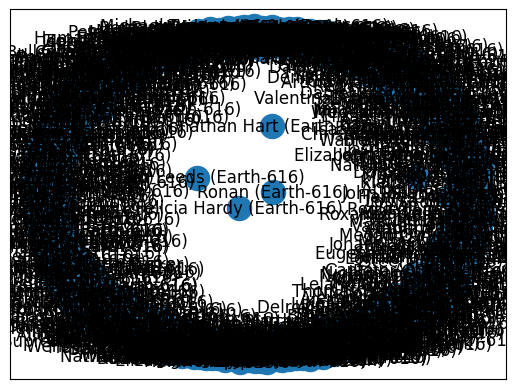

In [ ]:
# 7. Visualisasi graf jaringan
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.show()